In [1]:
# 1. Import Libraries

import sys
import tweepy
import tweepy
import csv
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# importing the pyttsx library 
import pyttsx3 
  
# initialisation 
engine = pyttsx3.init() 
  
# testing 
engine.say("Welcome, The Sentiment Analysis Algorithm :  Sentimento. Sentimento is the project guided by Mr Saifuddin Ahmed for seventh semester of Computer Science and Engineering Department of Barak Valley Engineering College , Karimganj , Assam")
engine.runAndWait()

In [2]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumerKey = '8960pswi0ALmad8bD27Bofh22'
consumerSecret = 'hSFcDZUsfwSbn3eutUirambdqLK1dwMyZkL40BAuoYY4mcbLbE'
accessToken = '934833577803616257-mVf5WjNVNfT2eWmQ4T46N2T2BDFZ1tV'
accessTokenSecret = '5xQVESFc6kGaQSbtdhvew1WPi73Yne1a9lTi62oPrkKba'

# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)


In [3]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [4]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [5]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["Arsenal"]
get_tweets(Topic , Count=100)

In [6]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-05-23 04:06:56,Honourable ET 💀,False,@SalibaEra_ Still doesn’t change the fact that...,0,0,Heaven 🌈
1,2021-05-23 04:06:55,🧽,False,@Goldsugarx they’re like the arsenal of the nb...,0,0,state of emergency
2,2021-05-23 04:06:37,Jersey GO,False,Ladies -Arsenal away |L -Chelsea Home |L -City...,0,0,"Jakarta,Indonesia"
3,2021-05-23 04:06:24,ITzAndre1215XD,False,@ItsSantigoca Arsenal y tower oh hell,0,0,Mexicali Mexico
4,2021-05-23 04:06:21,Orisunmibare,False,@BlackskinHeaven @AirLucas21 @MarfoRi94121081 ...,0,0,"Anambra, Nigeria"
5,2021-05-23 04:06:09,Talk Arsenal,False,"Every word Arteta said on Luiz injury, Martine...",0,0,"London, England"
6,2021-05-23 04:05:54,Arsenal Fans Network,False,Thomas Partey watching Atletico win the league...,0,0,"London, England"
7,2021-05-23 04:05:50,jamesmacharia981,False,CONGRATULATIONS!!!!.THIS WILL BE YOUR MESSAGE ...,1,0,


Analyze the tweets



In [10]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [11]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [12]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [13]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2021-05-23 04:06:56,Honourable ET 💀,False,@SalibaEra_ Still doesn’t change the fact that...,0,0,Heaven 🌈,still doesn t change the fact that arsenal are...
1,2021-05-23 04:06:55,🧽,False,@Goldsugarx they’re like the arsenal of the nb...,0,0,state of emergency,they re like the arsenal of the nba rn idk how...
2,2021-05-23 04:06:37,Jersey GO,False,Ladies -Arsenal away |L -Chelsea Home |L -City...,0,0,"Jakarta,Indonesia",ladies arsenal away l chelsea home l city home sm
3,2021-05-23 04:06:24,ITzAndre1215XD,False,@ItsSantigoca Arsenal y tower oh hell,0,0,Mexicali Mexico,arsenal y tower oh hell
4,2021-05-23 04:06:21,Orisunmibare,False,@BlackskinHeaven @AirLucas21 @MarfoRi94121081 ...,0,0,"Anambra, Nigeria",it happened with tottenham and liverpoo


In [14]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2021-05-23 04:06:56,Honourable ET 💀,False,@SalibaEra_ Still doesn’t change the fact that...,0,0,Heaven 🌈,still doesn t change the fact that arsenal are...,Neutral
1,2021-05-23 04:06:55,🧽,False,@Goldsugarx they’re like the arsenal of the nb...,0,0,state of emergency,they re like the arsenal of the nba rn idk how...,Neutral
2,2021-05-23 04:06:37,Jersey GO,False,Ladies -Arsenal away |L -Chelsea Home |L -City...,0,0,"Jakarta,Indonesia",ladies arsenal away l chelsea home l city home sm,Neutral
3,2021-05-23 04:06:24,ITzAndre1215XD,False,@ItsSantigoca Arsenal y tower oh hell,0,0,Mexicali Mexico,arsenal y tower oh hell,Neutral
4,2021-05-23 04:06:21,Orisunmibare,False,@BlackskinHeaven @AirLucas21 @MarfoRi94121081 ...,0,0,"Anambra, Nigeria",it happened with tottenham and liverpoo,Neutral


In [15]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 https://t.co/PSLKFUwZkL
Thomas Partey is La Liga Champion despite leaving Atletico for Arsenal – Citi Sports Online

Source: CitiNewsRoom

Clean tweet:
 thomas partey is la liga champion despite leaving atletico for arsenal citi sports online source citinewsroom

Sentiment of the tweet:
 Neutral


In [17]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Arsenal'] are : 101
Total Positive Tweets are : 36
Total Negative Tweets are : 13
Total Neutral Tweets are : 52


In [18]:
df["Sentiment"].value_counts()

Neutral     52
Positive    36
Negative    13
Name: Sentiment, dtype: int64

Text(0.5,1,'Summary of Counts for Total tweets')

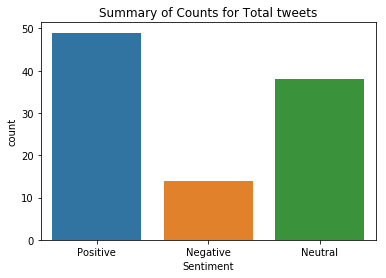

In [39]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")


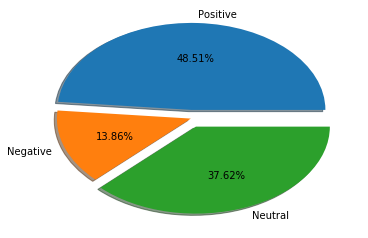

In [40]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

Text(0.5,1,'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

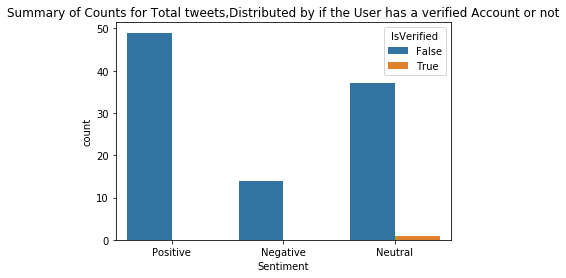

In [41]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

# Generate Word Cloud


In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

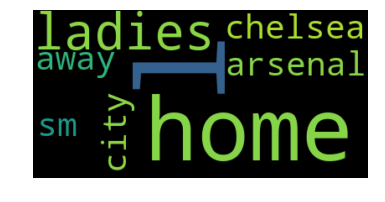

In [20]:
# Start with one review:

text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# WordCloud for whole data(Topic not included in WordCloud

There are 6793 words in the combination of all review.


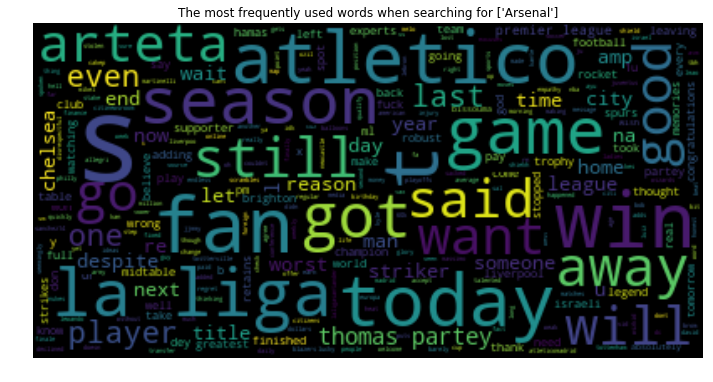

In [21]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

# New

## WordCloud for Positive tweets only (Topic not included in WordCloud)

There are 6793 words in the combination of all review.


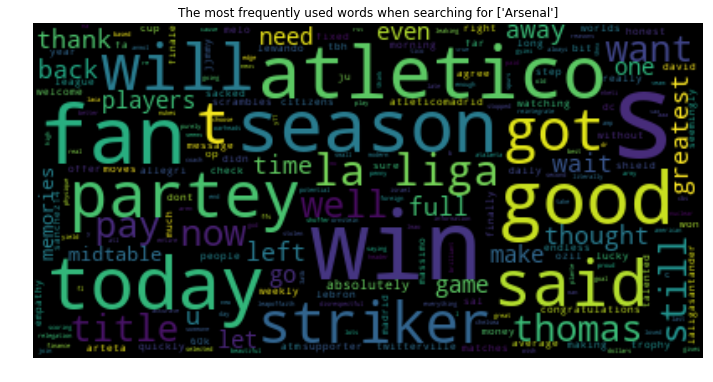

In [22]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

# Wordcloud for Negative tweets only (Topic not included in WordCloud)

There are 6793 words in the combination of all review.


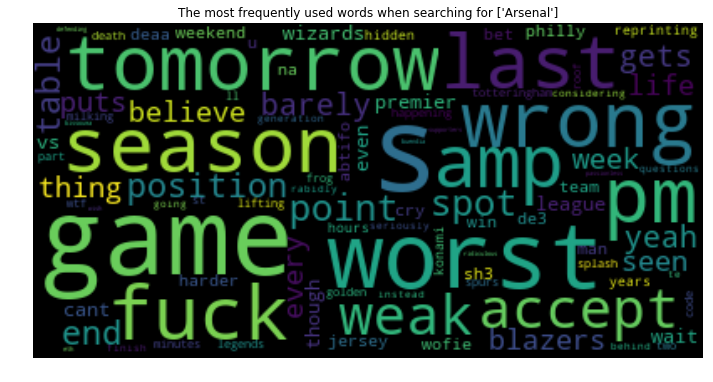

In [23]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()